### Import packages

In [3]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Load data

In [4]:
# Read in data
quakes = pd.read_csv("earthquake_data.csv")
boundaries = gpd.read_file("ne_110m_admin_0_countries.zip")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


### Brainstorming

1. Data Wrangling
- Make geometries from lon and lat columns, match crs to boundaries (make sure appropriate)
- Filter to 2017, magnitude >= 6.5, 

3. Initial plan


### Data wrangling


In [6]:
# Convert times to datetime objects
quakes['time'] = pd.to_datetime(quakes['time'].copy())

# Filter to magnitudes >= 6.5 and ensure year is 2014
quakes = quakes[(quakes['mag'] >= 6.5) & (quakes['time'].dt.year == 2014)]

# Create geometries using longitude and latitude columns
quakes['points'] = gpd.points_from_xy(quakes['longitude'], quakes['latitude'])

# Convert to geodataframe
quake_gdf = gpd.GeoDataFrame(quakes, 
                            geometry = 'points',
                            crs = 'EPSG:4326')

# Check crs
assert boundaries.crs == quake_gdf.crs

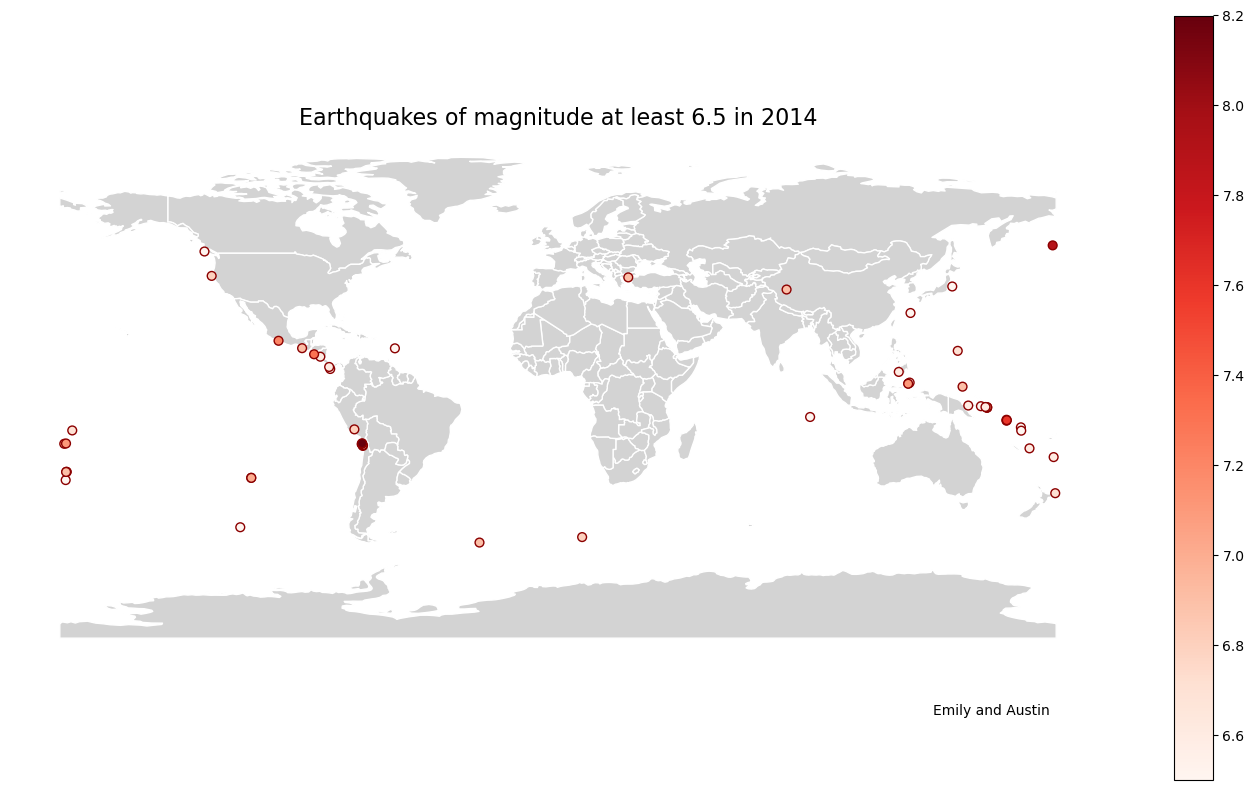

In [19]:
# Plot setup
fig, ax = plt.subplots(figsize=(14, 8))

# Plot boundaries
boundaries.plot(ax=ax, color='lightgray', edgecolor='white')

# Plot earthquakes with magnitude-based color
quake_gdf.plot(
    ax=ax,
    column='mag',
    cmap='Reds',
    markersize=40,
    legend=True,
    edgecolor="darkred"
)

# Title and source
ax.set_title("Earthquakes of magnitude at least 6.5 in 2014", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.figtext(.67,0.1, "Emily and Austin")
plt.show()
